# Exploratory Data Analysis
This EDA focuses on the analysis of artificial Twitter comments connected to the narcissistic scale.

## Load the data

In [1]:
import numpy as np
import pandas as pd

# Charts
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import re
import nltk
from nltk.corpus import stopwords

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

# Wordcloud
from wordcloud import WordCloud

In [2]:
# downaload the stopwords
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to

True

In [3]:
# Load the data
data_path = '../data/processed/processed_data.csv'
data = pd.read_csv(data_path)
data.head()

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,marital_status,twitter,none,facebook,instagram,tiktok,linkedin,pinterest,other,other_portals_7_text
0,"We travellee to australia, the country was hot...",Banning abortion is against human rights if ch...,3.333333,2.777778,1.0,NaN,38,1.0,NaN,2.0,...,1.0,6.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,Recently went to Iceland and can't believe how...,"Once again, men are dictating what women shoul...",2.777778,1.222222,2.0,NaN,28,8.0,British,1.0,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2,So excited to pick up my new BMW. It will be g...,Very unsure on the new government legislation....,3.222222,1.444444,2.0,NaN,31,1.0,NaN,2.0,...,4.0,6.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,Time travelling in thf future and back in time,Don't agree . There should be freedom of choice,3.888889,2.666667,1.0,NaN,57,1.0,NaN,2.0,...,2.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
4,barcelona is my favourite place to visit,everyone has a right to bodily autonomy - bann...,1.444444,1.777778,1.0,NaN,28,1.0,NaN,4.0,...,5.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f"Total number of rows: {len(data)}")

Total number of rows: 185


## Analyze the data

In [5]:
# Check the missing values
data.isnull().sum()

post_travel                   0
post_abortion                 0
adm                           0
riv                           0
gender                        0
gender_3_text               183
age                           0
ethnic_background             0
ethnic_background_8_text    179
education                     0
education_6_text            181
employment                    0
employment_7_text           174
marital_status                0
twitter                       0
none                        177
facebook                     50
instagram                    44
tiktok                      113
linkedin                    107
pinterest                   125
other                       168
other_portals_7_text        168
dtype: int64

Most people use Facebook and Instagram. The other platforms are not used that much.

In [6]:
# Check the number of unique values in each column
data.nunique()

post_travel                 185
post_abortion               185
adm                          36
riv                          30
gender                        3
gender_3_text                 2
age                          51
ethnic_background             7
ethnic_background_8_text      4
education                     6
education_6_text              3
employment                    8
employment_7_text             4
marital_status                5
twitter                       3
none                          1
facebook                      1
instagram                     1
tiktok                        1
linkedin                      1
pinterest                     1
other                         1
other_portals_7_text         13
dtype: int64

The bonus text fields (ending with text) are mostly empty (the total number of rows is 185). 
Apart from popular social media sites there are 13 other reported.

### Narcistic scale

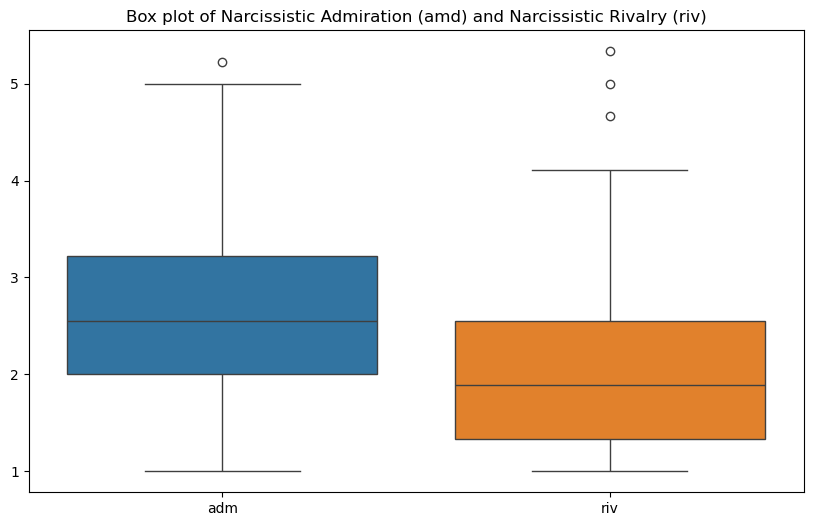

In [7]:
# plot the box chart of ADM and RIV column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['adm', 'riv']])
plt.title('Box plot of Narcissistic Admiration (amd) and Narcissistic Rivalry (riv)')
plt.show()


The two most important values are AMD - Narcissistic Admiration and RIV - Narcissistic Rivalry. Both of them are on a scale from 1 to 6, where 6 correlated with the strongest narcotics traits. However, our data show the ADM from 1 to 5 with one value bigger than that and on an RIV scale is from 1 to 4 with 3 outliers. 

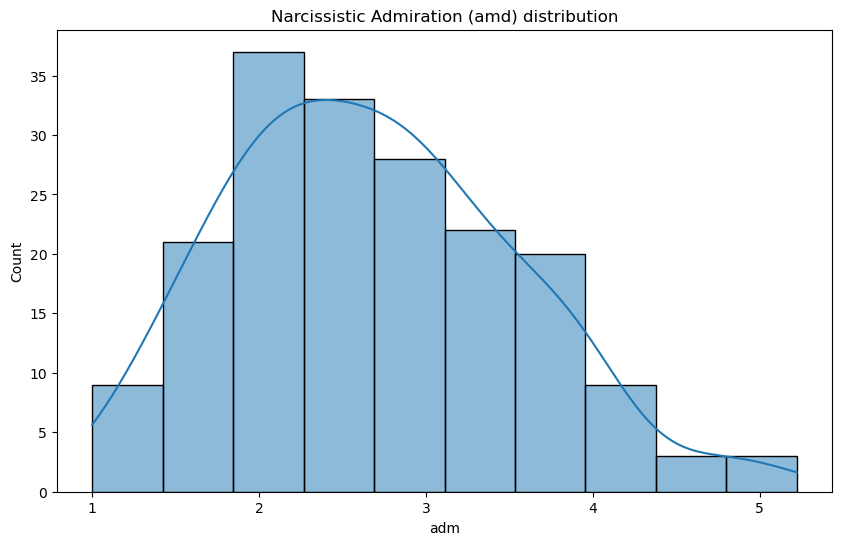

In [10]:
# Bar graph of adm distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['adm'], kde=True)
plt.title('Narcissistic Admiration (amd) distribution')
plt.show()


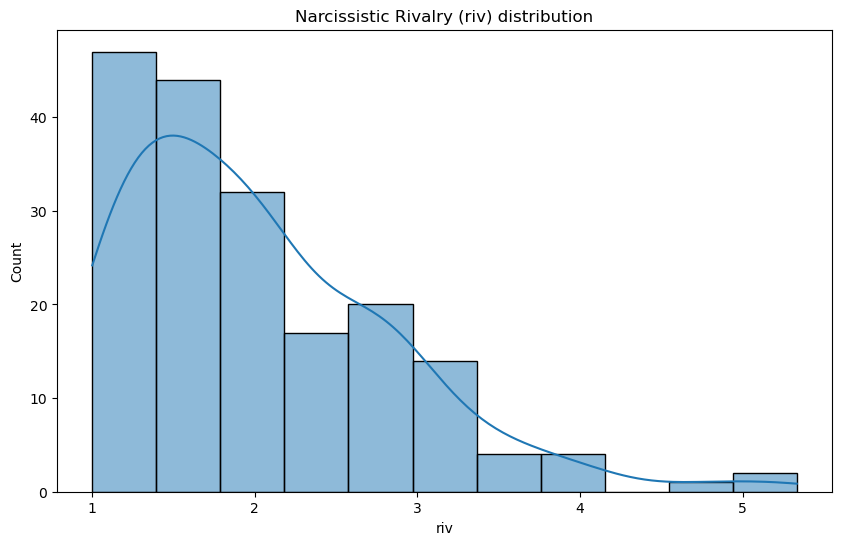

In [11]:
# Bar graph of riv distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['riv'], kde=True)
plt.title('Narcissistic Rivalry (riv) distribution')
plt.show()

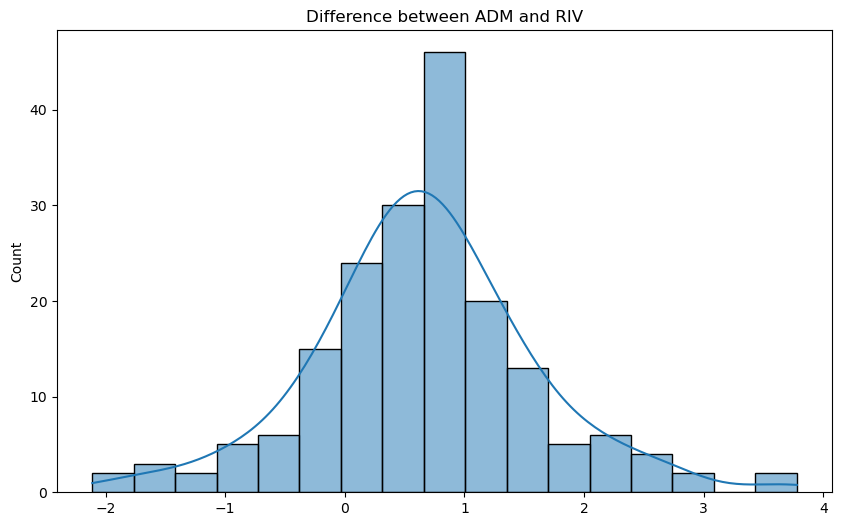

In [77]:
# Plot the difference between the two columns
plt.figure(figsize=(10, 6))
sns.histplot(data['adm'] - data['riv'], kde=True)
plt.title('Difference between ADM and RIV')
plt.show()

People from our data have a tendency to score higger on AMD scale than on RIV 

### Age and Gender distribution

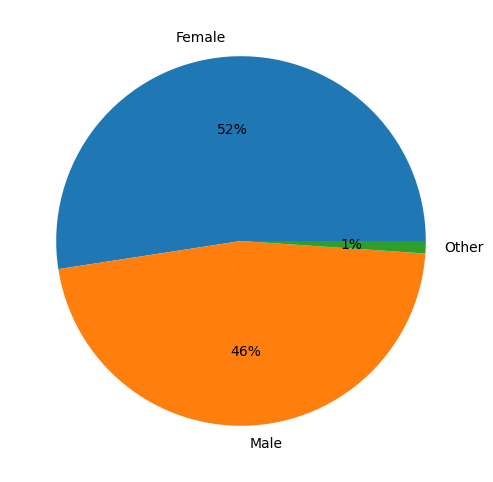

In [78]:
# Plot gender distribution
plt.figure(figsize=(10, 6))
plt.pie(data['gender'].value_counts(),labels=['Female','Male','Other']
        ,autopct='%.0f%%')
plt.show()

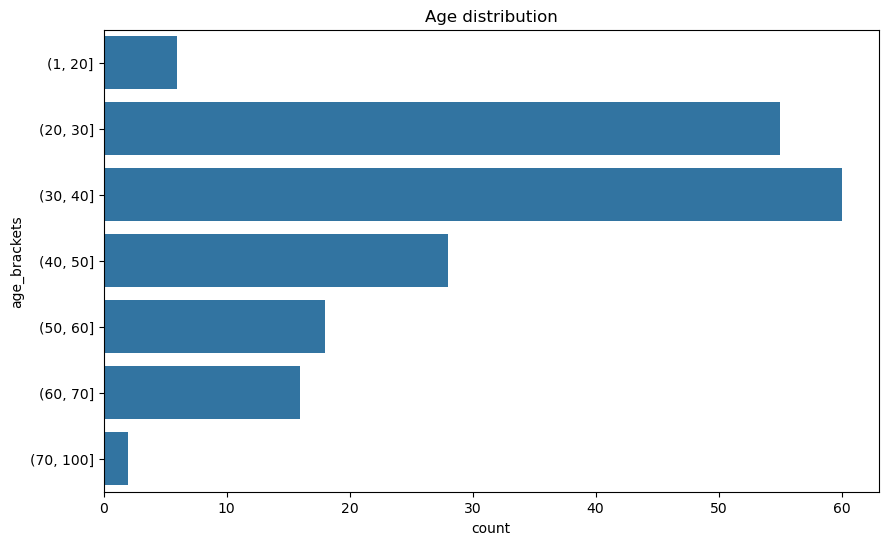

In [79]:
# Bar graph of the age distribution
# Create brackets for the age
age_brackets = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['age_brackets'] = pd.cut(data['age'], bins=[1, 20, 30, 40, 50, 60, 70, 100])
plt.figure(figsize=(10, 6))
sns.countplot(data['age_brackets'])
plt.title('Age distribution')
plt.show()

Most people are in the age group that normally use social media (both 20-30 and 30-40). 
The older age groups are less likely to use social media on an everyday basis (especially 60+).
That can explain the 17 people who don't use social media at all.

### Social media

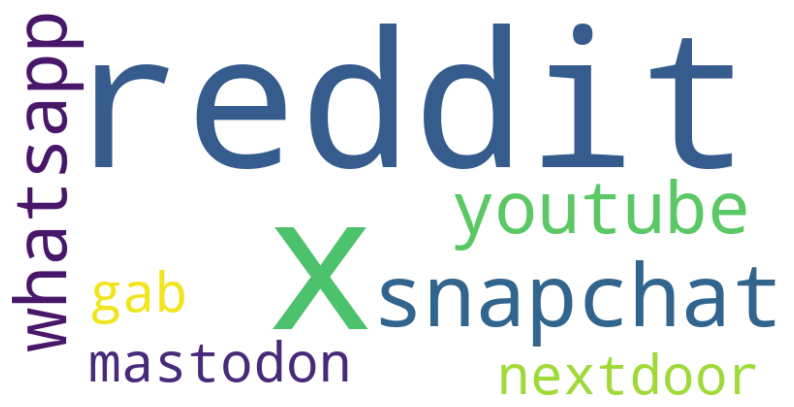

In [124]:
# plot of most popular other other_portals_7_text
# create a dictionary of row count in other_portals_7_text
other_portals_7_text = data['other_portals_7_text'].dropna()
# change the text to lowercase
other_portals_7_text = other_portals_7_text.str.lower()
# comma-separated text to list
other_portals_7_text = other_portals_7_text.str.split(',').explode()
# remove the punctuation ' and spaces
other_portals_7_text = other_portals_7_text.str.replace("'", "")
# remove the spaces
other_portals_7_text = other_portals_7_text.str.replace(" ", "")
dict_other_portals_7_text = Counter(other_portals_7_text)
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate_from_frequencies(dict_other_portals_7_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


Some people marked X as just a new name for Twitter (and this was stated in the survey). Nextdoor is a social network for neighborhoods semi-popular in the US and UK. 
Gab is a social media platform that is popular among the far-right. Mastodon is a federated social network. But all of these are only checked once in the survey. So there are
not any other popular social media platforms that are not already included in the survey.

# Twitter post analysis

In [143]:
# Getting character lenght of the post_abortion and post_travel columns 
data['length_abor'] = data['post_abortion'].str.len()
data['length_trav'] = data['post_travel'].str.len()
data[['post_abortion','post_travel','length_abor','length_trav']].head(5)

,post_abortion,post_travel,length_abor,length_trav
0,banning abortion human rights choice awful wom...,travellee australia country hot amazing love b...,69,72
1,men dictating women bodies,recently went iceland cant believe beautiful l...,26,93
2,unsure new government legislation tricky subje...,excited pick new bmw great able travel wales c...,108,70
3,dont agree freedom choice,time travelling thf future back time,25,36
4,everyone right bodily autonomy - banning abort...,barcelona favourite place visit,60,31


In [144]:
# Word count function
def word_count(text):
    words = text.split()
    return len(words)

In [147]:
# Getting word count of the post_abortion and post_travel columns
data['word_count_abor'] = data['post_abortion'].apply(word_count)
data['word_count_trav'] = data['post_travel'].apply(word_count)
data[['post_abortion','post_travel','word_count_abor',
      'word_count_trav']].head(5)

,post_abortion,post_travel,word_count_abor,word_count_trav
0,banning abortion human rights choice awful wom...,travellee australia country hot amazing love b...,10,10
1,men dictating women bodies,recently went iceland cant believe beautiful l...,4,15
2,unsure new government legislation tricky subje...,excited pick new bmw great able travel wales c...,14,12
3,dont agree freedom choice,time travelling thf future back time,4,6
4,everyone right bodily autonomy - banning abort...,barcelona favourite place visit,8,4


In [188]:
# Plot two distributions with the legend
def visualize(col_ab, col_trav,title):
    plt.subplot(1,2,2)
    sns.kdeplot(data[col_ab], label='abortion')
    sns.kdeplot(data[col_trav], label='travel')
    legend = plt.legend()
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

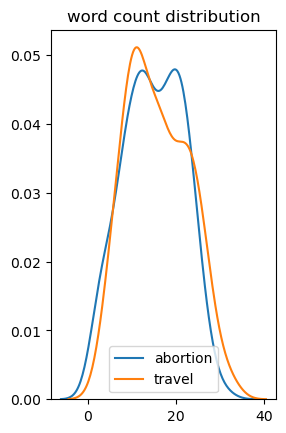

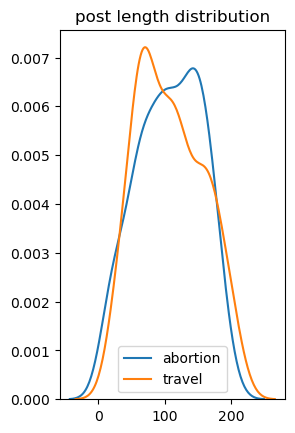

In [189]:
# visualize the distributions of the word count and the mean sentence length
visualize('word_count_abor', 'word_count_trav','word count distribution')
visualize('length_abor', 'length_trav', 'post length distribution')


In [190]:
print(f'Mean word count of the Abortion post: {data["word_count_abor"].mean() : .2f}')
print(f'Mean word count of the Travel Post: {data["word_count_trav"].mean() : .2f}')
print('')
print(f'Mean character length of the Abortion post: {data["length_abor"].mean() : .2f}')
print(f'Mean character length of the Travel Post: {data["length_trav"].mean() : .2f}')


Mean word count of the Abortion post:  14.88
Mean word count of the Travel Post:  15.81

Mean character length of the Abortion post:  106.71
Mean character length of the Travel Post:  107.90


The mean word count and mean character length are similar, also the extremes of the plots are very similar. The travel post is on average a little bit longer. The maximum length is lower than 280 which is the current limit (was 140 characters before November 2017).

## Term Frequency Analysis

In [191]:
# Clean the text
def clean(review):
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() 
                       if word not in stopwords.words('english')])
    return review

In [192]:
data['post_abortion'] = data['post_abortion'].apply(clean)
data['post_travel'] = data['post_travel'].apply(clean)
data.head(2)

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,other_portals_7_text,age_brackets,post_abortion_lists,post_travel_lists,length_abor,length_trav,word_count_abor,word_count_trav,mean_sentence_length_abor,mean_sentence_length_trav
0,travellee australia country hot amazing love b...,banning abortion human rights choice awful wom...,3.333333,2.777778,1.0,NaN,38,1.0,NaN,2.0,...,NaN,"(30, 40]","[banning, abortion, human, rights, choice, awf...","[travellee, australia, country, hot, amazing, ...",69,72,10,10,69.0,72.0
1,recently went iceland cant believe beautiful l...,men dictating women bodies,2.777778,1.222222,2.0,NaN,28,8.0,British,1.0,...,NaN,"(20, 30]","[men, dictating, women, bodies]","[recently, went, iceland, cant, believe, beaut...",26,93,4,15,26.0,93.0


In [195]:
# Create a corpus
def corpus(text):
    text_list = text.split()
    return text_list

In [196]:
data['post_abortion_lists'] = data['post_abortion'].apply(corpus)
data['post_travel_lists'] = data['post_travel'].apply(corpus)
data.head(2)

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,other_portals_7_text,age_brackets,post_abortion_lists,post_travel_lists,length_abor,length_trav,word_count_abor,word_count_trav,mean_sentence_length_abor,mean_sentence_length_trav
0,travellee australia country hot amazing love b...,banning abortion human rights choice awful wom...,3.333333,2.777778,1.0,NaN,38,1.0,NaN,2.0,...,NaN,"(30, 40]","[banning, abortion, human, rights, choice, awf...","[travellee, australia, country, hot, amazing, ...",69,72,10,10,69.0,72.0
1,recently went iceland cant believe beautiful l...,men dictating women bodies,2.777778,1.222222,2.0,NaN,28,8.0,British,1.0,...,NaN,"(20, 30]","[men, dictating, women, bodies]","[recently, went, iceland, cant, believe, beaut...",26,93,4,15,26.0,93.0


In [197]:
# Count the number of words in the corpus
corpus_ab = []
corpus_tr = []
for text in data['post_abortion_lists']:
    corpus_ab += text
for text in data['post_travel_lists']:
    corpus_tr += text
print(f"Abortion total words:\t{len(corpus_ab)} \nTravel total words:\t{len(corpus_tr)}")

Abortion total words:	2753 
Travel total words:	2924


### Most common words

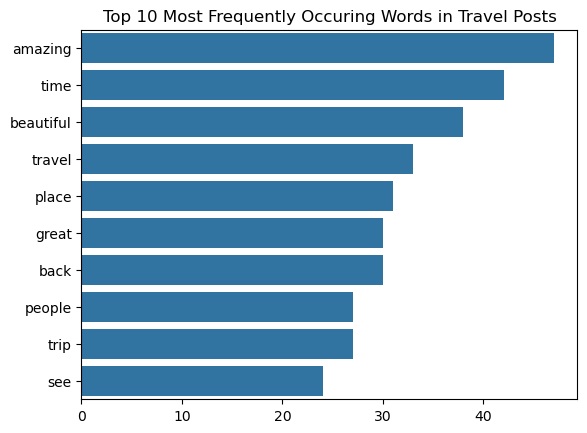

In [198]:
# Most common words
mostCommon_ab = Counter(corpus_ab).most_common(10)
mostCommon_tr = Counter(corpus_tr).most_common(10)

words = []
freq = []
for word, count in mostCommon_tr:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words in Travel Posts')
plt.show()


In the top 10 most common words in Travel post, we have some travel related words (travel, place, trip) and some positively emotional words (amazing, beautiful, 
great)

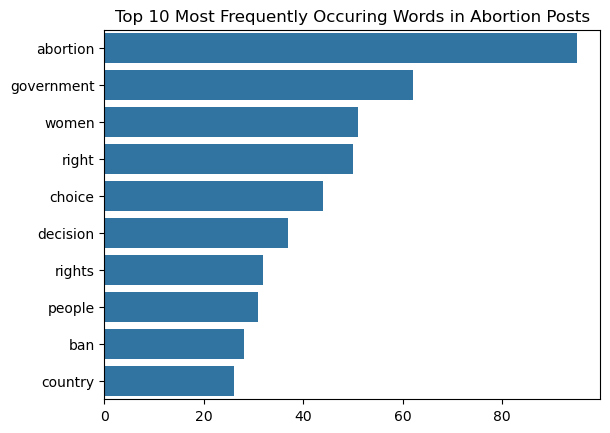

In [199]:
words = []
freq = []
for word, count in mostCommon_ab:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words in Abortion Posts')
plt.show()

In the abortion post the keyword is much more present (abortion - over 90 hits). This (with the other 5 top words) shows that in these emotional topics the vocabulary 
is limited.

In [200]:
def bigram_freq(column):
    cv = CountVectorizer(ngram_range=(2,2))
    bigrams = cv.fit_transform(column)
    count_values = bigrams.toarray().sum(axis=0)
    bigram_freq = pd.DataFrame(
        sorted([(count_values[i], k) 
                for k, i in cv.vocabulary_.items()], reverse = True))
    bigram_freq.columns = ["frequency", "bigram"]
    return bigram_freq


### Most common bigrams

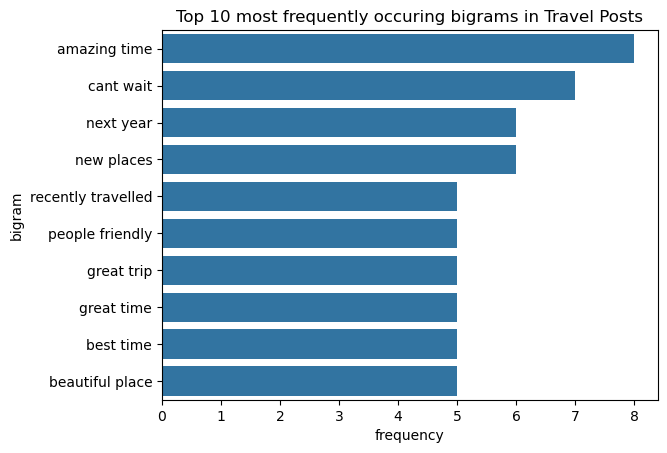

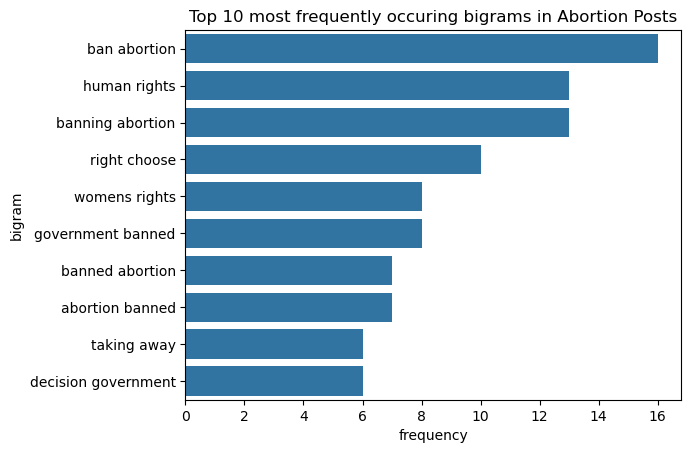

In [203]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams_ab_freq = bigram_freq(data['post_abortion'])
bigrams_tr_freq = bigram_freq(data['post_travel'])

sns.barplot(x=bigrams_tr_freq['frequency'][:10], 
            y=bigrams_tr_freq['bigram'][:10])
plt.title('Top 10 most frequently occuring bigrams in Travel Posts')
plt.show()

sns.barplot(x=bigrams_ab_freq['frequency'][:10], 
            y=bigrams_ab_freq['bigram'][:10])
plt.title('Top 10 most frequently occuring bigrams in Abortion Posts')
plt.show()


In bigrams it is clearly seen that bigram of abortion and banning (ban abortion, banning abortion, banned abortion, abortion banned) is the most popular giving in total 43 occurrences. Also top 10 Abortion biagrams are on average more popular. In travel posts there is a focus connected to a good time spent (amazing time, great time, best time and also next year and can't wait).

## Correlation Matrix

In [208]:
columns_for_corr_1 = ['adm', 'riv', 'length_abor', 'length_trav', 'word_count_abor', 'word_count_trav']
columns_for_corr_2 = ['adm', 'riv','gender','age', 'education', 'marital_status','employment','ethnic_background']

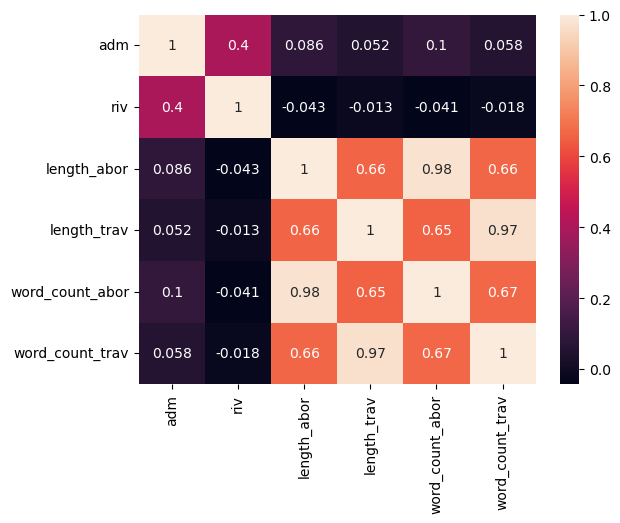

In [209]:
sns.heatmap(data[columns_for_corr_1].corr(), annot=True)
plt.show()

There is a standard correlation between word count and the length of a post. There is also a strong correlation between the length of one post with the length of the second post. The Narcisstic Admiration and Narcissitic Rivarry traits are also correlated. In the terms of length of a post and the Narcissistic traits there isn't any strong correlation. The interesting thing however is that ADM is weakly positively correlating and the RIV is rather very weakly negatively correlating.

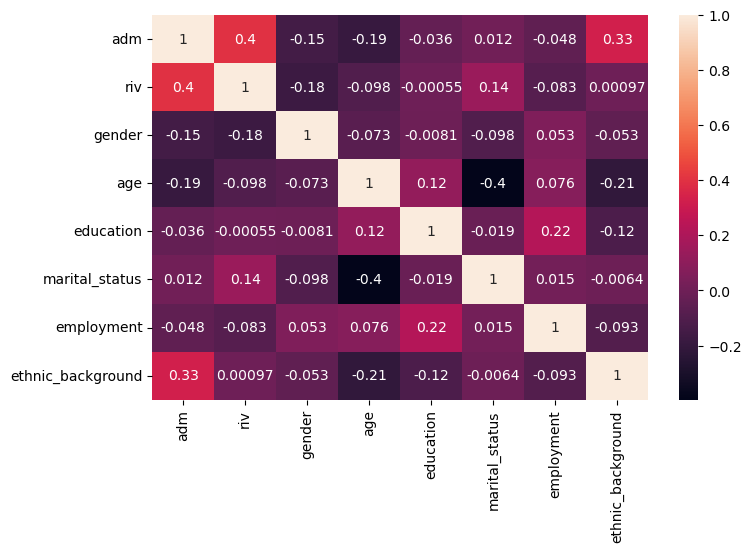

In [210]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[columns_for_corr_2].corr(), annot=True)
plt.show()

In this correlation matrix, we mostly don't see any correlation between narcism and other labels - which can be a good sight that means that our data is rather general. 
The weird thing is a correlation between ethnic background and ADM. It may come from small samples in some ethnic groups. The correlations between employment and education or marital status and age are common signs. There is also a small negative correlation between gender and narcissism (in this data men have higher scores of both ADM and RIV). Also, there is a correlation between younger people and ADM narcissism.

## Summary

The data (total 185 observations) represents a good range of Narcissistic Admiration. The Narcissistic Rivalry scores are a little bit lower, but still most observations are between 1 and 4 (on a scale of 1 to 6). The data is exaly divided by gender and most participants are between 20 and 50 years old - which is our target group of people using X (former Twitter). The post length is a plausible in case of Twitter with mean length of 107 characters (15-16 words) for both types of posts.


The emotional (abortion) post has a more topic-focused vocabulary and a less diverse vocabulary than the normal (travel) post. This could generate some problems when making model more general. 


In data there isn't a strong correlation between posts length and Narcissitics traits. That is also the case for Narcissism and demographics.
